### Simple Analyis:
1. Isolated gender and age to assess the distribution of the respondents by age + gender. 
2. Simple descriptive statistics and some graphical representation:

    a. The age distribution by gender was examined. 
    b. In 2014 there were 11,592 respondents; 56% female, 44% male.
    c. There are more female than male respondents at all age levels except below 20yrs where they are almost equal.
    d. The average age of female respondents = 47.8 yrs (17.5 stdev); male respondents = 49.6 yrs (18.2 stdev).
    

### Correlation Exercise:
1. 
2. A merge of additional data limited to a few columns of data.
    a. Age distribtuion of Macro Analysis [age distribution of male vs femaleSimple descriptive statistics plus some correlation estimates.
4. 

In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
all_summary = pd.read_csv('data/atussum_2014.dat')
gender_sum = all_summary[['tucaseid','TEAGE', 'TESEX']]
gender_sum = gender_sum.rename(columns={'tucaseid':'CASE_ID',
                              'TEAGE': 'AGE',       # age in years
                              'TESEX': 'GENDER'     # gender; Male = 1, Female = 2
                                     }
                            )

m_age = gender_sum[gender_sum.GENDER == 1]          # Male = 1; list of ages
f_age = gender_sum[gender_sum.GENDER == 2]          # Female = 2; distribtuion of ages 

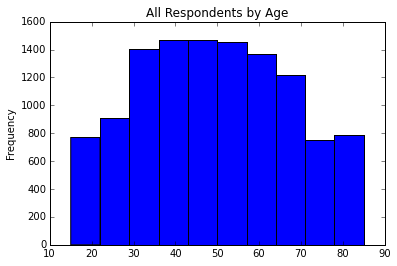

In [17]:
gender_sum['AGE'].plot(kind='hist')
plt.title("All Respondents by Age")
plt.ylabel("Frequency")

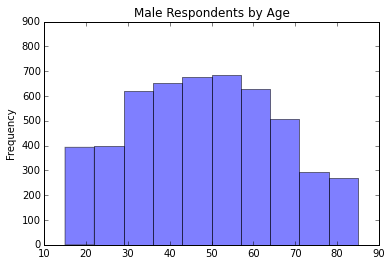

In [23]:
m_age['AGE'].plot(kind='hist', color='b', alpha=0.5, ylim=(0,900))
plt.title("Male Respondents by Age")
plt.ylabel("Frequency")

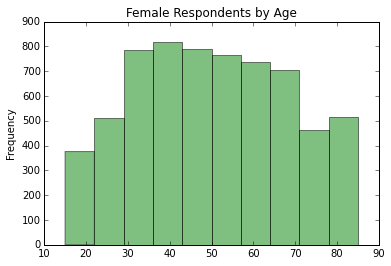

In [21]:
f_age['AGE'].plot(kind='hist', color='g', alpha=0.5)
plt.title("Female Respondents by Age")
plt.ylabel("Frequency")

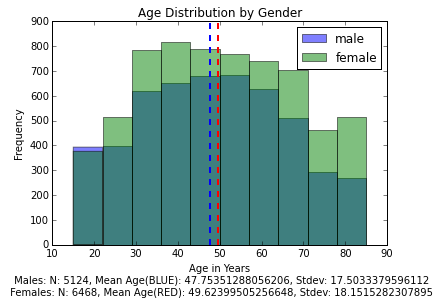

In [10]:
x = list(m_age['AGE'])      # true list of male ages
y = list(f_age['AGE'])      # true list of female ages
xm = m_age['AGE'].mean()    # mean of male ages
yf = f_age['AGE'].mean()    # mean of female ages

plt.hist(x, bins=10, alpha=0.5, label='male')
plt.axvline(xm, color='b', linestyle='dashed', linewidth=2)
plt.hist(y, bins=10, alpha=0.5, label='female')
plt.axvline(yf, color='r', linestyle='dashed', linewidth=2)
plt.legend()
plt.title("Age Distribution by Gender")
plt.xlabel('Age in Years\n Males: N: {}, Mean Age(BLUE): {}, Stdev: {}\n Females: N: {}, Mean Age(RED): {}, Stdev: {}'.format(
        np.count_nonzero(x),np.mean(x),np.std(x),np.count_nonzero(y),np.mean(y),np.std(y)))
plt.ylabel('Frequency')
plt.show()


A more detailed look at Home Schooling by Household Income:

In [58]:
home_school = all_summary[['tucaseid','TRERNWA','PEEDUCA','TRCHILDNUM','t030203',]]
home_school = home_school.rename(columns={'tucaseid': 'CASE_ID',
                                          'PEEDUCA': 'MAX_ED',                # need categories
                                          'TRERNWA': 'WEEKLY_EARN',           # implied 2 digit weekly $
                                          'TRCHILDNUM': 'CHILDREN',           # number of children under 18 yrs.
                                          't030203': 'HOME_SCHOOLED',         # household children are homeschooled
                                          }
                                 )
home_school = home_school[home_school.CHILDREN != 0]            # removes those without children
home_school = home_school[home_school.WEEKLY_EARN != -1]        # removes those without recorded income

Assumptions for the maximum education scoring in variable; 'PEEDUCA'
    1. <= 38:     less than high school
    2. 39:        high school
    3. 40 to 42:  some college
    4. 43:        Bachelor's degree
    5. >= 44:     Graduate degree

In [75]:
home_school.corr()

,CASE_ID,WEEKLY_EARN,MAX_ED,CHILDREN,HOME_SCHOOLED
CASE_ID,1.000000,-0.012341,-0.037618,0.002075,-0.015567
WEEKLY_EARN,-0.012341,1.000000,0.471904,0.018295,-0.015953
MAX_ED,-0.037618,0.471904,1.000000,-0.069425,0.006640
CHILDREN,0.002075,0.018295,-0.069425,1.000000,-0.019055
HOME_SCHOOLED,-0.015567,-0.015953,0.006640,-0.019055,1.000000


Observations:
    1. The strongest positive correlation is between higher education and weekly earnings.
    2. The weakest correlation is between home schooling and maximum education.
    3. The strongest negative correlation is between higher education and the number of children.
    
 

In [74]:
kid_list = list(home_school['CHILDREN'])
plt.hist(kid_list)
plt.show()

SyntaxError: invalid syntax (<ipython-input-74-19903c433a92>, line 2)

(array([  1.34000000e+03,   1.20200000e+03,   4.69000000e+02,
          0.00000000e+00,   1.10000000e+02,   1.40000000e+01,
          0.00000000e+00,   6.00000000e+00,   5.00000000e+00,
          1.00000000e+00]),
 array([ 1. ,  1.7,  2.4,  3.1,  3.8,  4.5,  5.2,  5.9,  6.6,  7.3,  8. ]),
 <a list of 10 Patch objects>)

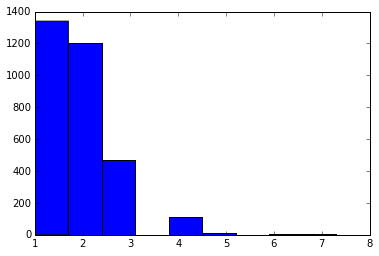

In [73]:
plt.hist(kid_list)

In [12]:
pd.pivot_table(gender_sum, index=['GENDER'], values=['AGE'], aggfunc=[np.amin, np.amax, np.count_nonzero, np.average])

,amin,amax,count_nonzero,average
,AGE,AGE,AGE,AGE
GENDER,,,,
1,15,85,5124,47.753513
2,15,85,6468,49.623995


In [41]:
pd.pivot_table(gender_sum, index=['GENDER'], values=['AGE'], aggfunc=[np.count_nonzero, np.average])

,count_nonzero,average
,AGE,AGE
GENDER,,
1,5124,47.753513
2,6468,49.623995


In [62]:
gender_sum.loc[1][['AGE','GENDER']]

AGE       16
GENDER     2
Name: 1, dtype: int64